# Contrôle Continu

### AZIZ Shana

# Préparation des données

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = None

## 1- Charger la donnée

In [4]:
raw_data = pd.read_csv("input/diabetes.txt", sep="\t")

## 2- Afficher les 10 premières lignes de la raw_data

In [5]:
# Regarder dans la base
raw_data.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,NaN,35,0.0,33.6,0.627,50,1
1,1.0,85,NaN,29,0.0,26.6,0.351,31,0
2,8.0,183,NaN,0,0.0,23.3,0.672,32,1
3,1.0,89,NaN,23,94.0,28.1,0.167,21,0
4,0.0,137,NaN,35,168.0,43.1,2.288,33,1
5,5.0,116,NaN,0,0.0,25.6,0.201,30,0
6,3.0,78,NaN,32,88.0,31.0,0.248,26,1
7,10.0,115,NaN,0,0.0,35.3,0.134,29,0
8,2.0,197,NaN,45,543.0,30.5,0.158,53,1
9,8.0,125,NaN,0,0.0,0.0,0.232,54,1


## 3- Afficher les 10 dernières lignes de la raw_data

In [6]:
# Regarder dans la base
raw_data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1.0,106,76.0,0,0.0,37.5,0.197,26,0
759,6.0,190,92.0,0,0.0,35.5,0.278,66,1
760,2.0,88,58.0,26,16.0,28.4,0.766,22,0
761,9.0,170,74.0,31,0.0,44.0,0.403,43,1
762,9.0,89,62.0,0,0.0,22.5,0.142,33,0
763,10.0,101,76.0,48,180.0,32.9,0.171,63,0
764,2.0,122,70.0,27,0.0,36.8,0.340,27,0
765,5.0,121,72.0,23,112.0,26.2,0.245,30,0
766,1.0,126,60.0,0,0.0,30.1,0.349,47,1
767,1.0,93,70.0,31,0.0,30.4,0.315,23,0


## 4- Quelle est la dimension (nombre de lignes et nombre de colonnes) de raw_data ?

In [7]:
raw_data.shape

(768, 9)

## 5- Afficher les informations concernant les colonnes et leur type respectif

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               741 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   747 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  581 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


## 6- Combien y-a-t-il de variables numériques

In [9]:
len(raw_data.select_dtypes(["int64", "float64"]).columns)

9

## 7- Quelles sont les deux variables ayant le plus de valeurs manquantes

In [10]:
# nombre de valeurs manquantes
missing_vars = raw_data.isnull().sum().sort_values(ascending=False)
print(missing_vars)



DiabetesPedigreeFunction    187
Pregnancies                  27
Insulin                      21
BloodPressure                20
Glucose                       0
SkinThickness                 0
BMI                           0
Age                           0
Outcome                       0
dtype: int64


In [11]:
print(missing_vars.head(2))

DiabetesPedigreeFunction    187
Pregnancies                  27
dtype: int64


## 8- Quelle est la proportion de valeurs manquantes dans les deux variables comportant le moins de valeurs manquantes ?

In [12]:
raw_data.isnull().mean().sort_values(ascending=False).head(2)


DiabetesPedigreeFunction    0.243490
Pregnancies                 0.035156
dtype: float64

## 9- Convertir la variable "Pregnancies" en entier

In [13]:
raw_data_conv = raw_data.copy()
raw_data_conv["Pregnancies"] = raw_data_conv["Pregnancies"].astype("Int64")
raw_data_conv.info()

# Que faire des valuers vides ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               741 non-null    Int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   747 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  581 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: Int64(1), float64(4), int64(4)
memory usage: 54.9 KB


## 10- Vérifier que la conversion a bien été faite

In [14]:
raw_data_conv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               741 non-null    Int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   747 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  581 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: Int64(1), float64(4), int64(4)
memory usage: 54.9 KB


## 11- imputer la variables Pregnancies par la médiane 

In [15]:
pregnancies_data_median =  raw_data_conv["Pregnancies"].fillna(raw_data_conv["Pregnancies"].median())


## 12- Vérifier que l'imputation a bien été faite

In [16]:
print(" les stats descriptives après imputation par la médiane :", pregnancies_data_median.describe())
print("Null value count: ", pregnancies_data_median.isnull().sum())


 les stats descriptives après imputation par la médiane : count       768.0
mean       3.8125
std      3.309541
min           0.0
25%           1.0
50%           3.0
75%           6.0
max          15.0
Name: Pregnancies, dtype: Float64
Null value count:  0


## 13- Comment la moyenne et la médiane de la variable Pregnancies ont été modifiées après l'imputation

In [17]:
print("Before Inputation")
print(raw_data_conv["Pregnancies"].describe())
print("After Inputation")
print(pregnancies_data_median.describe())

Before Inputation
count       741.0
mean     3.842105
std      3.365671
min           0.0
25%           1.0
50%           3.0
75%           6.0
max          15.0
Name: Pregnancies, dtype: Float64
After Inputation
count       768.0
mean       3.8125
std      3.309541
min           0.0
25%           1.0
50%           3.0
75%           6.0
max          15.0
Name: Pregnancies, dtype: Float64


## 14- Imputer toutes les autres valeurs manquantes par la stratégie de votre choix et explique

### Manuellement

In [18]:
raw_data_conv.info()
# Si ecart type serrer => Moyenne, sinon Mediane
# Blood Pressure
print("--------\nBloodPressuer \n")
print(raw_data_conv["BloodPressure"].describe())
blood_pressure_mean = raw_data_conv["BloodPressure"].fillna(raw_data_conv["BloodPressure"].mean())

# Insulin
print("\nInsulin \n")
print(raw_data_conv["Insulin"].describe())
insulin_median = raw_data_conv["Insulin"].fillna(raw_data_conv["Insulin"].median())

# Diabetes Pedrigree Function
print("\nDiabetes Pedrigree Function \n")
print(raw_data_conv["DiabetesPedigreeFunction"].describe())
diabetes_pedigree_function_median = raw_data_conv["DiabetesPedigreeFunction"].fillna(raw_data_conv["DiabetesPedigreeFunction"].median())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               741 non-null    Int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   747 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  581 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: Int64(1), float64(4), int64(4)
memory usage: 54.9 KB
--------
BloodPressuer 

count    748.000000
mean      69.303476
std       19.124972
min        0.000000
25%       63.500000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Insulin 

In [19]:
raw_data_inputed = raw_data_conv.copy()

raw_data_inputed["Pregnancies"] = pregnancies_data_median
raw_data_inputed["BloodPressure"] = blood_pressure_mean
raw_data_inputed["Insulin"] = insulin_median
raw_data_inputed["DiabetesPedigreeFunction"] = diabetes_pedigree_function_median

raw_data_inputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    Int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: Int64(1), float64(4), int64(4)
memory usage: 54.9 KB


### Automatisé

## 15 Sélectionner toutes les variables sauf outcome 

In [20]:
selected_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
cleaned_data = raw_data_inputed[selected_cols]

cleaned_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,69.303476,35,0.0,33.6,0.627,50
1,1,85,69.303476,29,0.0,26.6,0.351,31
2,8,183,69.303476,0,0.0,23.3,0.672,32
3,1,89,69.303476,23,94.0,28.1,0.167,21
4,0,137,69.303476,35,168.0,43.1,2.288,33
5,5,116,69.303476,0,0.0,25.6,0.201,30
6,3,78,69.303476,32,88.0,31.0,0.248,26
7,10,115,69.303476,0,0.0,35.3,0.134,29
8,2,197,69.303476,45,543.0,30.5,0.158,53
9,8,125,69.303476,0,0.0,0.0,0.232,54


## 16 travailler uniquement les personnes ayant eu au moins une grossesse et la mettre dans une nouvelle table de données nommée donnees_propres

In [21]:
donnees_propres = cleaned_data[cleaned_data["Pregnancies"] > 0]

donnees_propres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               661 non-null    Int64  
 1   Glucose                   661 non-null    int64  
 2   BloodPressure             661 non-null    float64
 3   SkinThickness             661 non-null    int64  
 4   Insulin                   661 non-null    float64
 5   BMI                       661 non-null    float64
 6   DiabetesPedigreeFunction  661 non-null    float64
 7   Age                       661 non-null    int64  
dtypes: Int64(1), float64(4), int64(3)
memory usage: 47.1 KB


## 17 calculer et afficher la table de correlation de la table donnees_propre

In [22]:
corr = donnees_propres[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.159155,0.156916,-0.079859,-0.098161,0.081252,0.000789,0.544184
Glucose,0.159155,1.000000,0.168165,0.026742,0.315719,0.196425,0.100423,0.302983
BloodPressure,0.156916,0.168165,1.000000,0.162232,0.069073,0.341495,0.054681,0.270292
SkinThickness,-0.079859,0.026742,0.162232,1.000000,0.426865,0.372544,0.172380,-0.088098
Insulin,-0.098161,0.315719,0.069073,0.426865,1.000000,0.183492,0.208938,-0.036077
BMI,0.081252,0.196425,0.341495,0.372544,0.183492,1.000000,0.102693,0.065034
DiabetesPedigreeFunction,0.000789,0.100423,0.054681,0.172380,0.208938,0.102693,1.000000,0.020884
Age,0.544184,0.302983,0.270292,-0.088098,-0.036077,0.065034,0.020884,1.000000


## 18 afficher le graphe de la table de correspondance

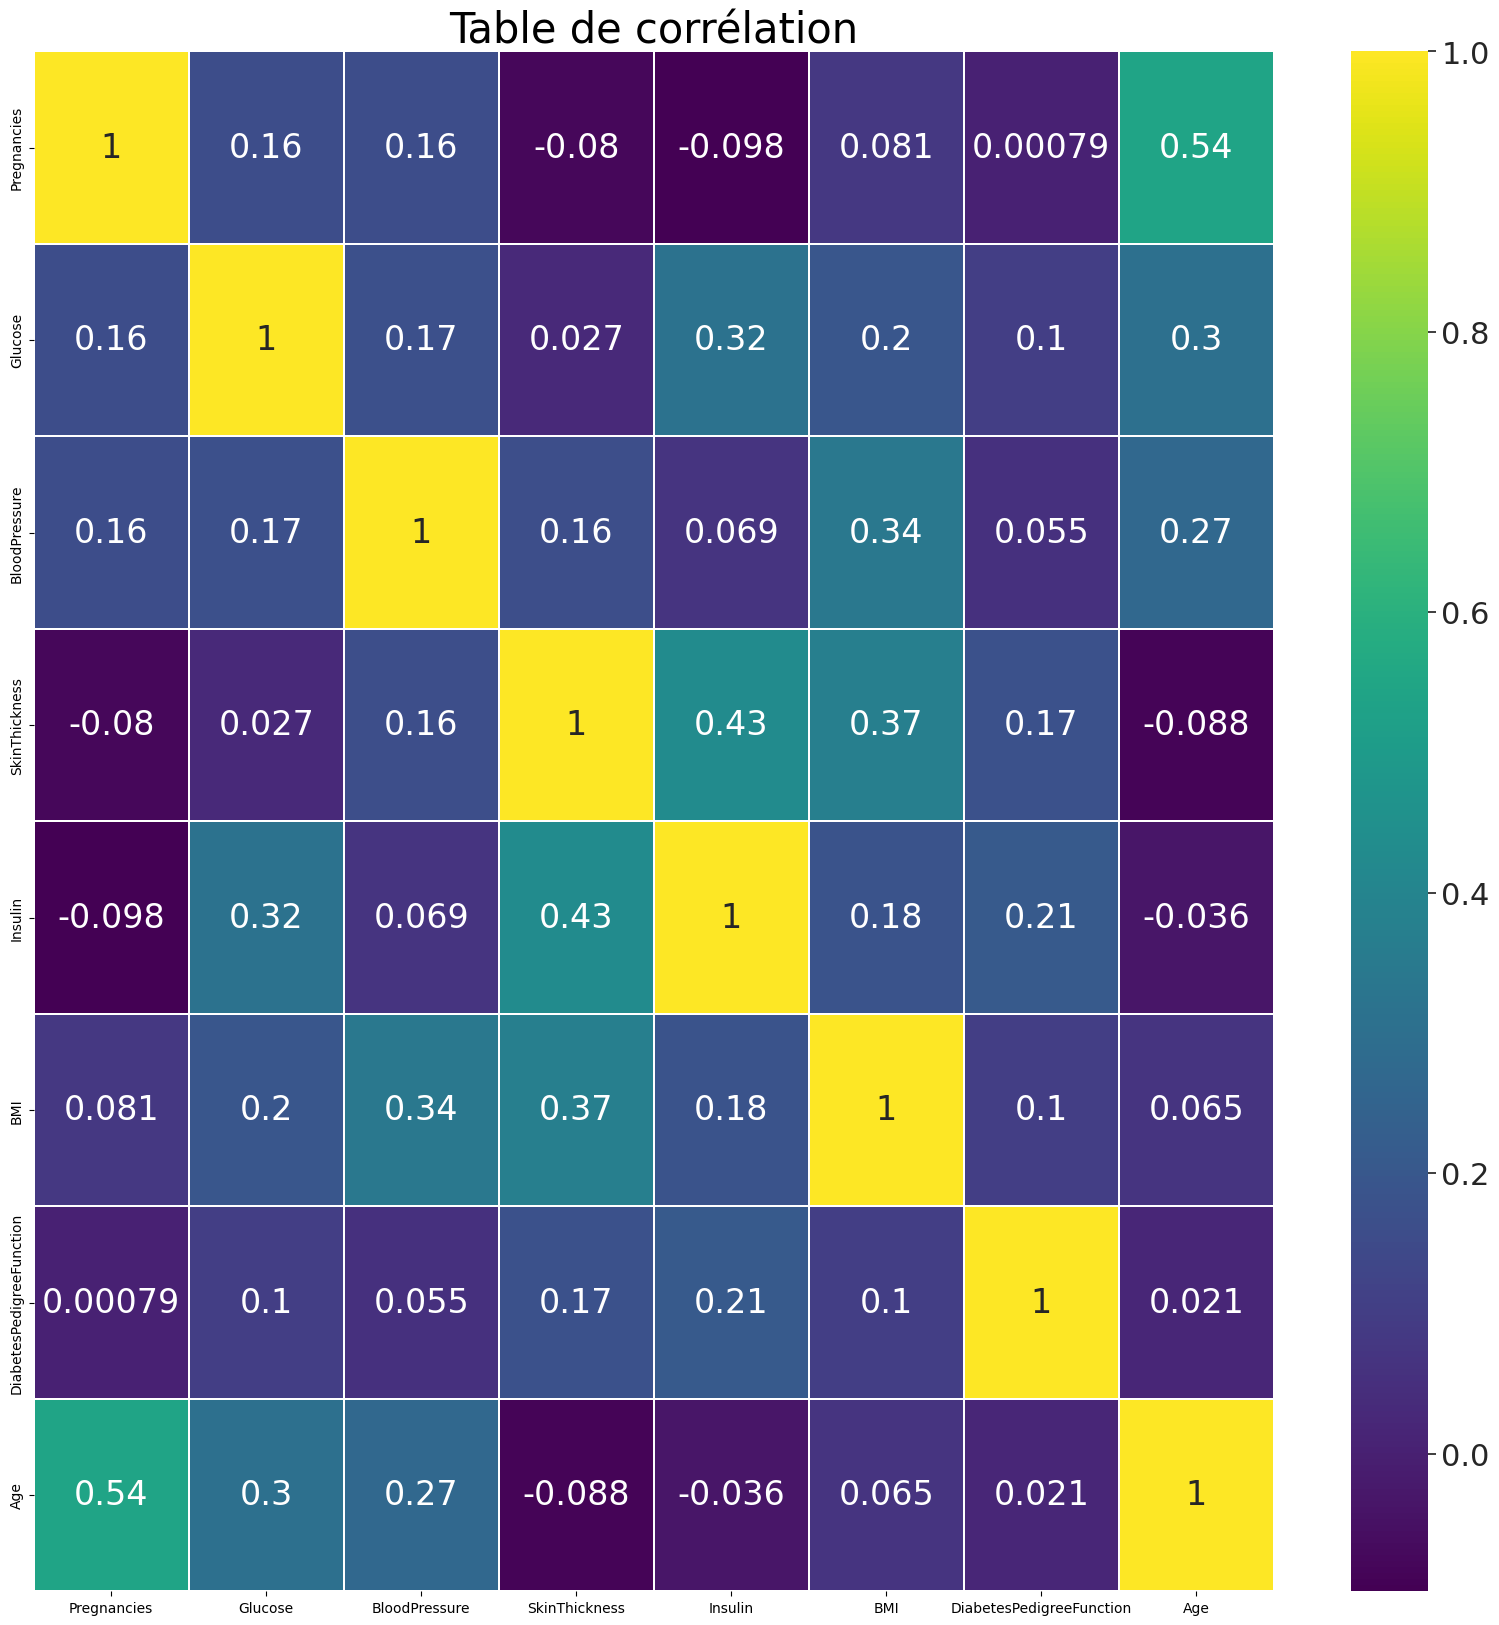

In [23]:
# graphique des correlations
plt.figure(figsize=(20, 20))

plt.title("Table de corrélation", fontsize=30)

sns.set(style="darkgrid", font_scale=2)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)

sns.heatmap(corr, 
            cmap='viridis',
            cbar=True,
            linewidths=0.3,
            annot=True,
           );

## 19 afficher les statistiques descriptives des variables numériques

In [24]:
donnees_propres.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,661.0,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,4.429652,120.555219,69.740488,20.269289,78.196672,31.682148,0.449554,34.149773
std,3.160835,32.300184,17.874275,15.771381,113.214428,7.452155,0.285569,11.798701
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000
25%,2.0,99.000000,64.000000,0.000000,0.000000,27.100000,0.268000,25.000000
50%,3.0,116.000000,72.000000,23.000000,32.000000,31.600000,0.378000,30.000000
75%,7.0,141.000000,80.000000,32.000000,126.000000,35.900000,0.537000,41.000000
max,15.0,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000


## 20- Recoder la variable Age de la façon suivante en age_rec

    - si age < 18 alors "mineurs"
    - si age compris entre 18 et 25 alors "juniors"
    - si age comrpis entre 25 et 50 alors "jeunes"
    - si age > 50 alors "senior"


In [25]:
bins = [0, 18, 25, 50, np.inf]
names = ['mineurs', 'juniors', 'jeunes', 'seniors']

donnees_propres['age_rec'] = pd.cut(donnees_propres['Age'], bins, labels=names)




/tmp/ipykernel_8874/3766386878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_propres['age_rec'] = pd.cut(donnees_propres['Age'], bins, labels=names)



## 21- Afficher le décompte de "age_rec"

In [26]:
donnees_propres["age_rec"].value_counts()


age_rec
jeunes     386
juniors    200
seniors     75
mineurs      0
Name: count, dtype: int64

In [27]:
donnees_propres[donnees_propres["age_rec"] == "seniors"].sort_values("Age", ascending=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,age_rec
236,7,181,84.000000,21,192.0,35.9,0.586,51,seniors
14,5,166,69.303476,19,175.0,25.8,0.587,51,seniors
24,11,143,94.000000,33,146.0,36.6,0.378,51,seniors
517,7,125,86.000000,0,0.0,37.6,0.304,51,seniors
458,10,148,84.000000,48,237.0,37.6,1.001,51,seniors
...,...,...,...,...,...,...,...,...,...
123,5,132,80.000000,0,0.0,26.8,0.378,69,seniors
684,5,136,82.000000,0,0.0,0.0,0.640,69,seniors
666,4,145,82.000000,18,0.0,32.5,0.235,70,seniors
453,2,119,0.000000,0,0.0,19.6,0.832,72,seniors
